# Cointegration

# Intuition

Read [Drunk woman walking with her dog](http://faculty.wwu.edu/kriegj/Econ470/A%20drunk%20and%20her%20dog.pdf) [PDF].

Simplified:
- Two time series X and Y
- Perform linear regression to find $\alpha$ and $\beta$ in equation $Y = \alpha \ X + \beta$
- Calculate $residue = Y - \alpha \ X$
- If residue is stationary, then X and Y are cointegrated

Read [Integration, Cointegration, and Stationarity](https://github.com/Auquan/Tutorials/blob/master/Integration%2C%20Cointegration%2C%20and%20Stationarity.ipynb).

# Let's Try

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import coint
N = 500

In [190]:
def plotCoint(l1, y1, l2, y2, figsize=(15, 6), style='bmh'):
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ax1 = plt.subplot2grid(layout, (0, 0), colspan=2, rowspan=2)
        rax = plt.subplot2grid(layout, (2, 0), colspan=2)

        t, pval, _ = coint(y1, y2)
        rel = 'COINTEGRATED' if pval < 0.05 else 'NOT cointegrated'
        ax1.set_title('%s and %s: %s (pval: %.4f)' % (l1, l2, rel, pval))
        ax1.plot(y1, label=l1, color='C0')
        
        ax2 = ax1.twinx()
        ax2.plot(y2, label=l2, color='C1')
        
        ax1.legend(loc=2)
        ax1.grid(True)
        ax1.set_ylabel(l1)
        
        ax2.set_ylabel(l2)
        ax2.grid(False)
        ax2.legend(loc=1)
        
        ax1.tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
        
        coefs = np.polyfit(y1, y2, 1)
        residue = y2 - coefs[0] * y1
        rax.plot(residue, label='Residue', color='C2', zorder=10)
        rax.axhline(residue.mean(), label='Mean', linestyle='--', color='C1', zorder=0)
        rax.set_title('Residue')
        rax.legend()

        plt.tight_layout()

# Two Random Walks

Two completely random walk time series.

In [127]:
def generateRandomWalk(n=N, seed=1):
    np.random.seed(seed)

    x = w = np.random.normal(scale=1, size=n)
    for t in range(n):
        x[t] = x[t-1] + w[t]
    return x

### Two Random Walks 1

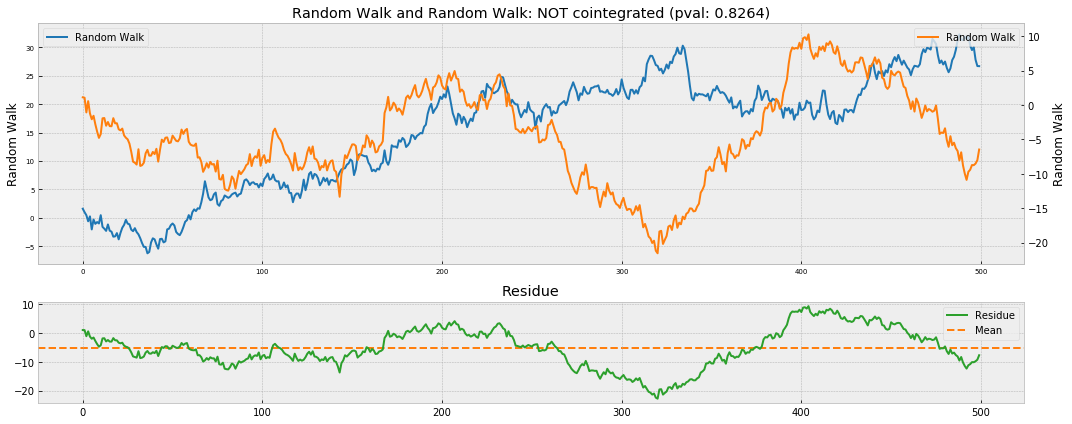

In [191]:
y1 = generateRandomWalk(seed=1)
y2 = generateRandomWalk(seed=2)

plotCoint('Random Walk', y1, 'Random Walk', y2)

### Two Random Walks 2

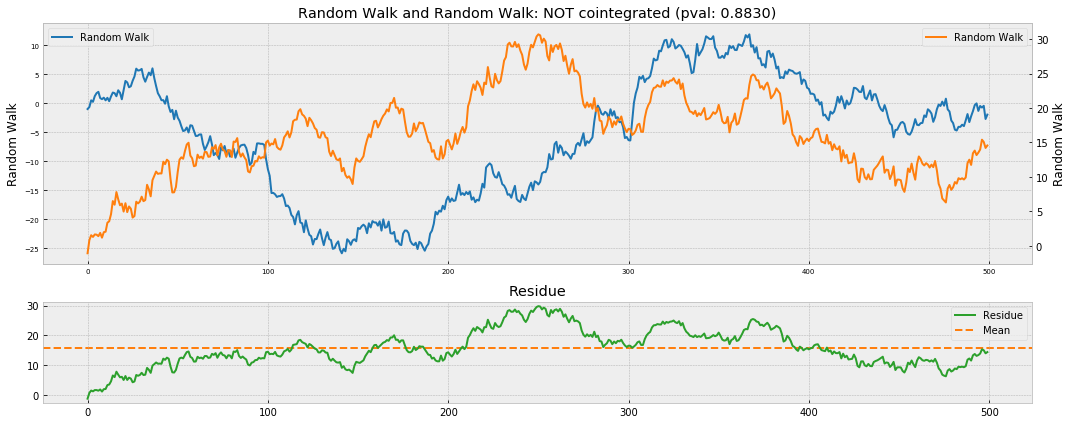

In [182]:
y1 = generateRandomWalk(seed=100)
y2 = generateRandomWalk(seed=200)

plotCoint('Random Walk', y1, 'Random Walk', y2)

# Lagged Time Series

y2 is exactly y1, lagged by some time periods.


### Lag 10

In [153]:
maxlag = 500
y = generateRandomWalk(n=N+maxlag)

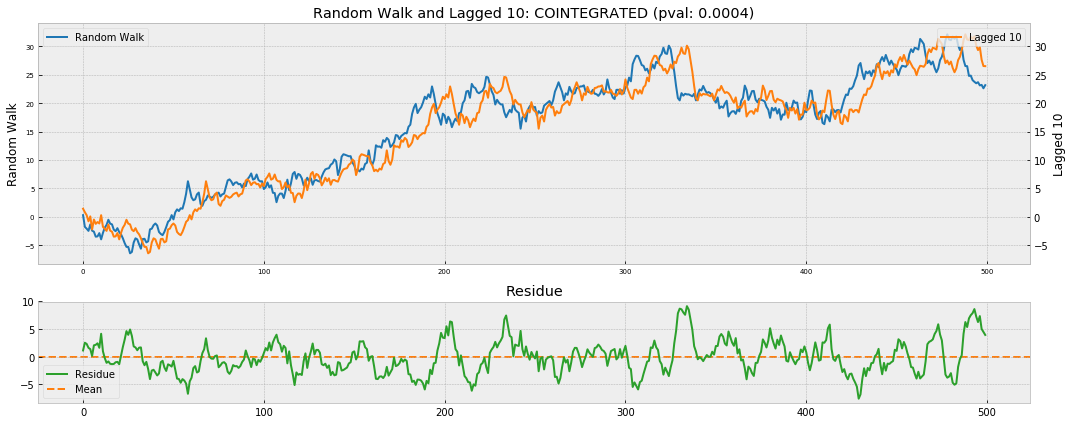

In [183]:
lag = 10
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 20

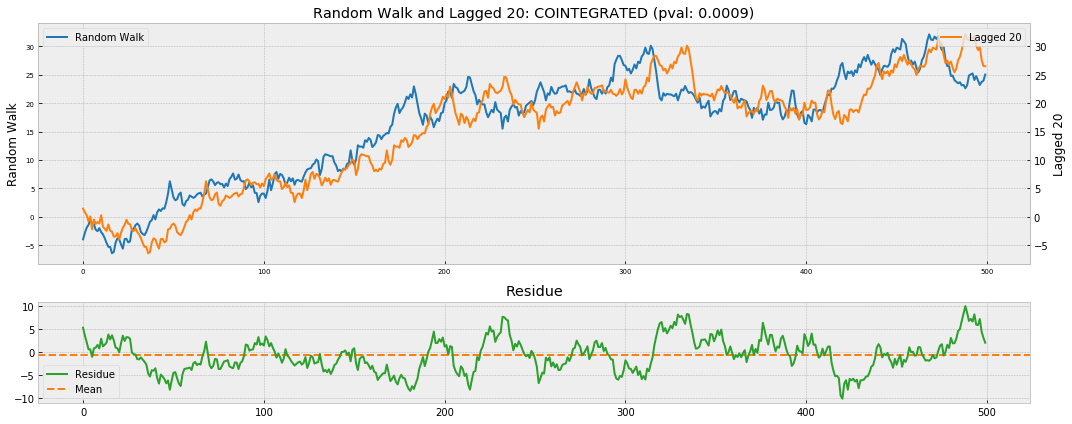

In [164]:
lag = 20
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 50

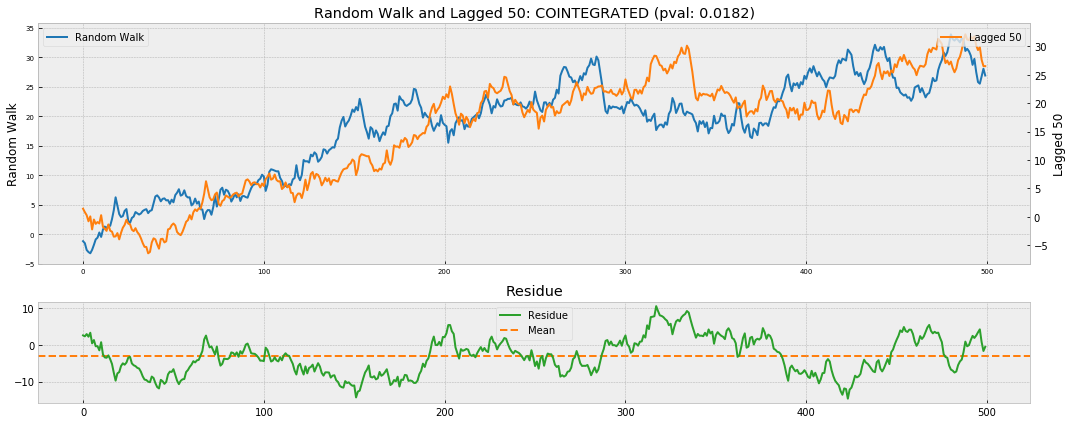

In [184]:
lag = 50
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 100

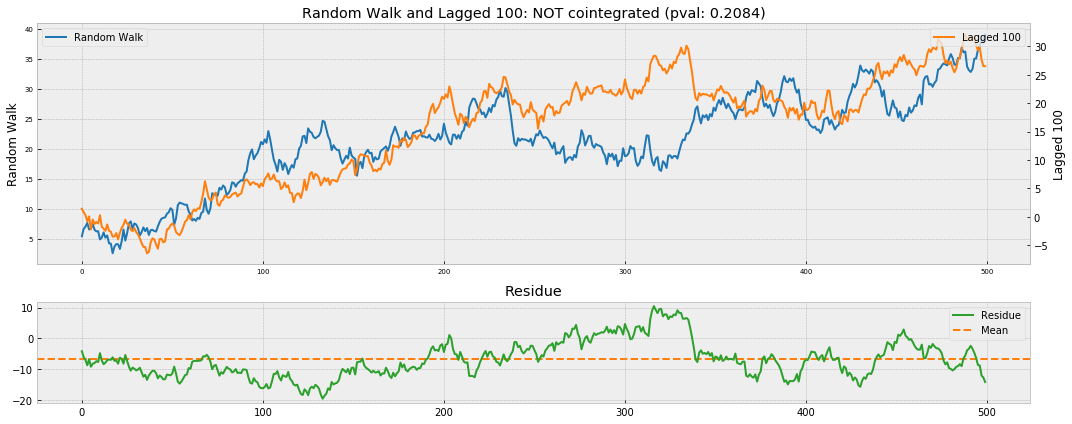

In [166]:
lag = 100
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

# Preceeding

The inverse of lagged.

### Preceeding 10

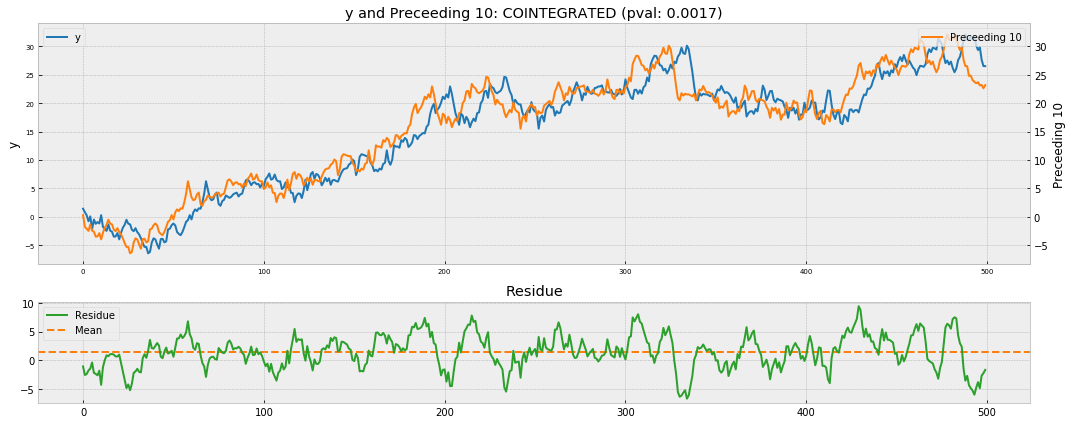

In [169]:
lag = 10
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

### Preceeding 20

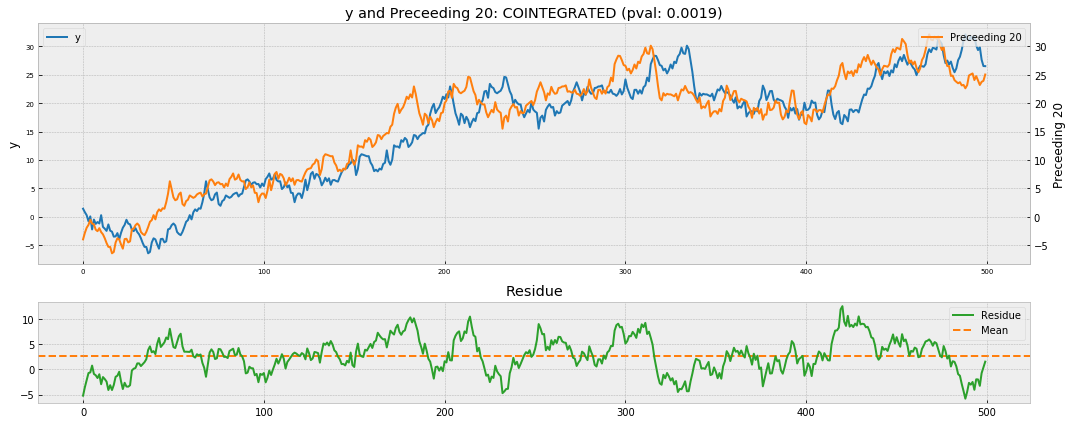

In [171]:
lag = 20
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

### Preceeding 50

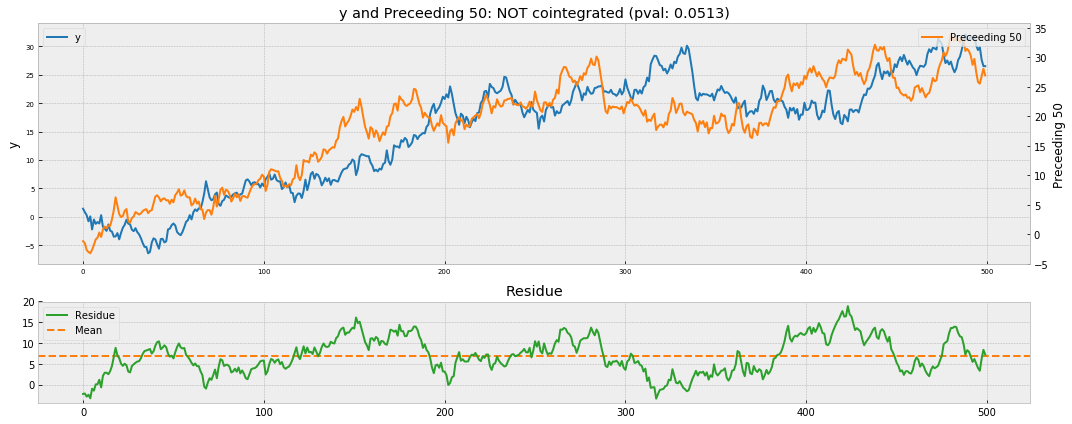

In [170]:
lag = 50
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

**NOTE**: lag 50 **was cointegrated**, which is different than this result.

### Preceeding 100

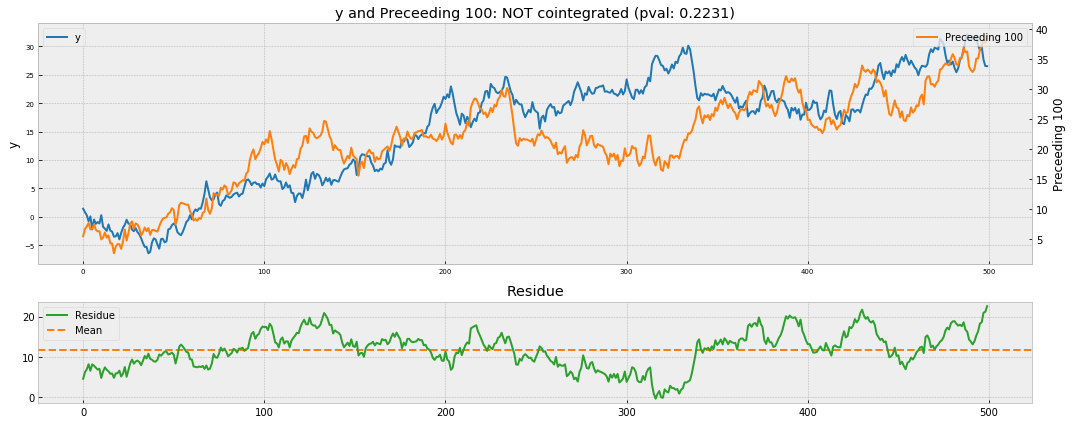

In [173]:
lag = 100
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

# Flipped <a name="flipped">

Inversed time series (plus a bit of white noise).

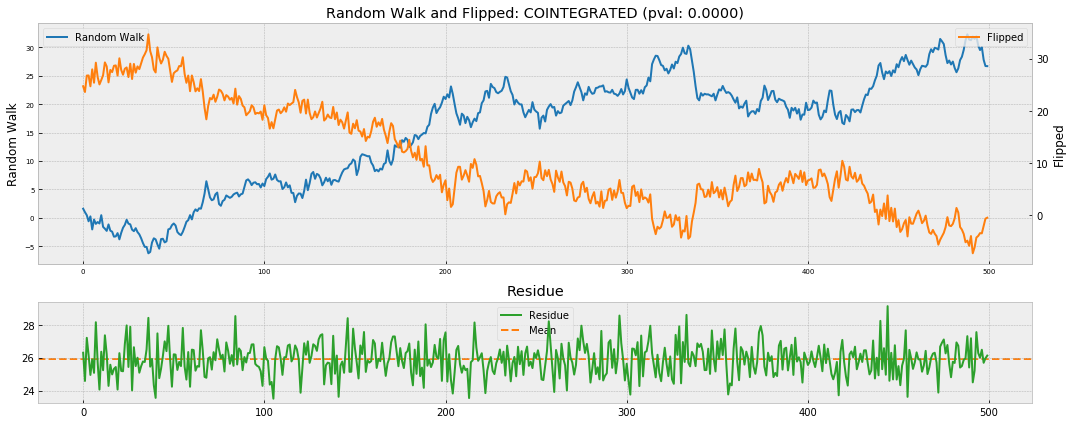

In [192]:
w = np.random.normal(size=N)
y1 = generateRandomWalk()
m = (y1.max() + y1.min()) / 2
y2 = 2 * m - y1 + w

plotCoint('Random Walk', y1, 'Flipped', y2)

# Linearly Amplified

y2 is amplified time series of y1 (notice y axis scales are different).

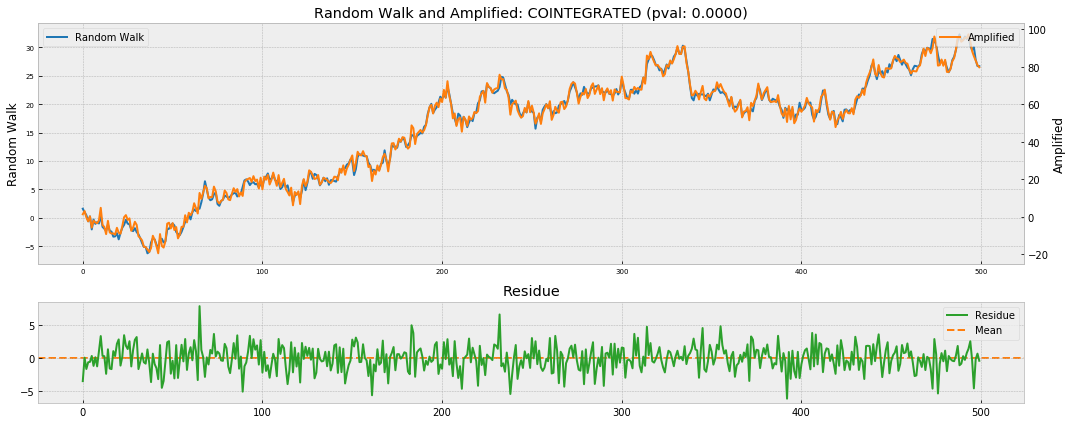

In [175]:
y1 = generateRandomWalk()

w2 = np.random.normal(size=N, scale=2)
y2 = y1 * 3 + w2

plotCoint('Random Walk', y1, 'Amplified', y2)